# Exploratory Data Analysis & Modelling

In this notebook, we will be performing our exploratory data analysis to find any trends and relationship bewteen words of each subreddit. In addition we will proceed with our modelling where we will choose the best model and evaluate it. 

### Contents:
* [Import Libraries & Read Dataset](#Import-Libraries-&-Read-Dataset)  
 * [r/JapanTravel](#r/JapanTravel)
 * [r/SoloTravel](#r/SoloTravel)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
 * [Explore Most Frequent Occuring Words in Title Feature](#Explore-Most-Frequent-Occuring-Words-in-Title-Feature)
 * [Explore Most Frequent Occuring Words in Posts Feature](#Explore-Most-Frequent-Occuring-Words-in-Posts-Feature)
  * [Unigram](#Unigram)
  * [Bigram](#Bigram)
* [Preprocessing](#Preprocessing)
* [Baseline](#Baseline)
* [Modelling](#Modelling)
 * [Create X features and target y](#Create-X-features-and-target-y)
 * [Train Test Split](#Train-Test-Split)
* [Logistic Regression Model](#Logistic-Regression-Model)
 * [Logistic Regression (with CountVectorizer)](#Logistic-Regression-(with-CountVectorizer))
 * [Logistic Regression (with TFIDF Vectorizer)](#Logistic-Regression-(with-TFIDF-Vectorizer))
* [Naive Bayes Model (Multinomial)](#Naive-Bayes-Model-(Multinomial))
 * [Multinomial Naive Bayes (with CountVectorizer)](#Multinomial-Naive-Bayes-(with-CountVectorizer))
 * [Multinomial Naive Bayes (with TFIDF Vectorizer)](#Multinomial-Naive-Bayes-(with-TFIDF-Vectorizer))
* [Model Selection](#Model-Selection)
* [Model Test Data](#Model-Test-Data)
* [Analysis of Coefficients](#Analysis-of-Coefficients)
* [Classification Metrics](#Classification-Metrics)
 * [Precision](#Precision)
 * [Recall](#Recall)
 * [F1](#F1)
* [Recomendations and Conclusions](#Recomendations-and-Conclusions)
* [Further Exploration](#Further-Exploration)

## Import Libraries & Read Dataset

In [113]:
#import basic libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#scikitlearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.naive_bayes import MultinomialNB

#nlp
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import regex as re
from bs4 import BeautifulSoup   

In [2]:
japan_df = pd.read_csv("../datasets/japan_travel.csv")
solo_df = pd.read_csv("../datasets/solo_travel.csv")

##### r/JapanTravel

In [3]:
japan_df.shape

(980, 5)

In [4]:
japan_df.describe()

,author,title,selftext,subreddit,posts
count,980,980,978,980,980
unique,838,979,977,1,980
top,amyranthlovely,Itinerary check - 9 Days Couple Trip (29/2 - 8...,Hey everybody!\n\nI've been using /r/JapanTrav...,JapanTravel,How cheap are the Japanese versions of GameCub...
freq,25,2,2,980,1


##### r/SoloTravel

In [5]:
solo_df.shape

(892, 5)

In [6]:
solo_df.describe()

,author,title,selftext,subreddit,posts
count,892,892,885,892,892
unique,751,892,885,1,892
top,phoneinsick,"Been planning a trip for a year, now I can't r...",I was pretty disappointed with Dublin. Maybe i...,solotravel,I finally book a trip this year and my flight ...
freq,12,1,1,892,1


### Exploratory Data Analysis

In our exploratory data analysis, we will be looking to explore any interesting trends and analysis through visualisations.

As we are relying our model to precict words of the subreddit to classify into the 2 reddit posts, we will first explore the most common words that frequently occur in both the title only and the posts with title in totality. 

To do this we will use Natural Language Processing (NLP) which allows computers to understand our human language on how to examine and sort these words that we feed to it.

#### Explore Most Frequent Occuring Words in Title Feature

Here we will use a CountVectorizer to convert the text data of the various title of each reddit post while removing common english stopwords. We remove these stop words as they create noise within our text data and are not essential for classification. 

##### JapanTravel

In [7]:
#Instantiate a CountVectorizer while removing stop words
cvec = CountVectorizer(stop_words='english')

# Fit our vectorizer using our corpus
cvec_japan = cvec.fit_transform(japan_df['title'])

print('Number of features: {}'.format(len(cvec.get_feature_names())))

Number of features: 1574


In [8]:
#Convert to dataframe
japan_title = pd.DataFrame(cvec_japan.toarray(),
                      columns = cvec.get_feature_names())

In [9]:
#top 20 words
japan_title.sum().sort_values(ascending=False).head(20)

tokyo              271
itinerary          258
check              158
kyoto              153
japan              146
trip               137
osaka              120
days                73
march               65
april               65
2021                65
day                 63
gt                  52
2020                50
report              43
advice              43
travel              43
hakone              37
recommendations     36
weeks               35
dtype: int64

##### SoloTravel

In [10]:
# Fit our vectorizer using our corpus
cvec_solo = cvec.fit_transform(solo_df['title'])

print('Number of features: {}'.format(len(cvec.get_feature_names())))

Number of features: 1700


In [11]:
#Convert to dataframe
solo_title = pd.DataFrame(cvec_solo.toarray(),
                      columns = cvec.get_feature_names())

In [12]:
#top 20 words
solo_title.sum().sort_values(ascending=False).head(20)

solo          191
travel        188
trip          105
traveling      81
long           34
travelling     34
time           33
europe         32
people         30
advice         30
covid          28
best           26
year           26
tips           23
country        22
new            22
does           22
mexico         21
did            21
road           21
dtype: int64

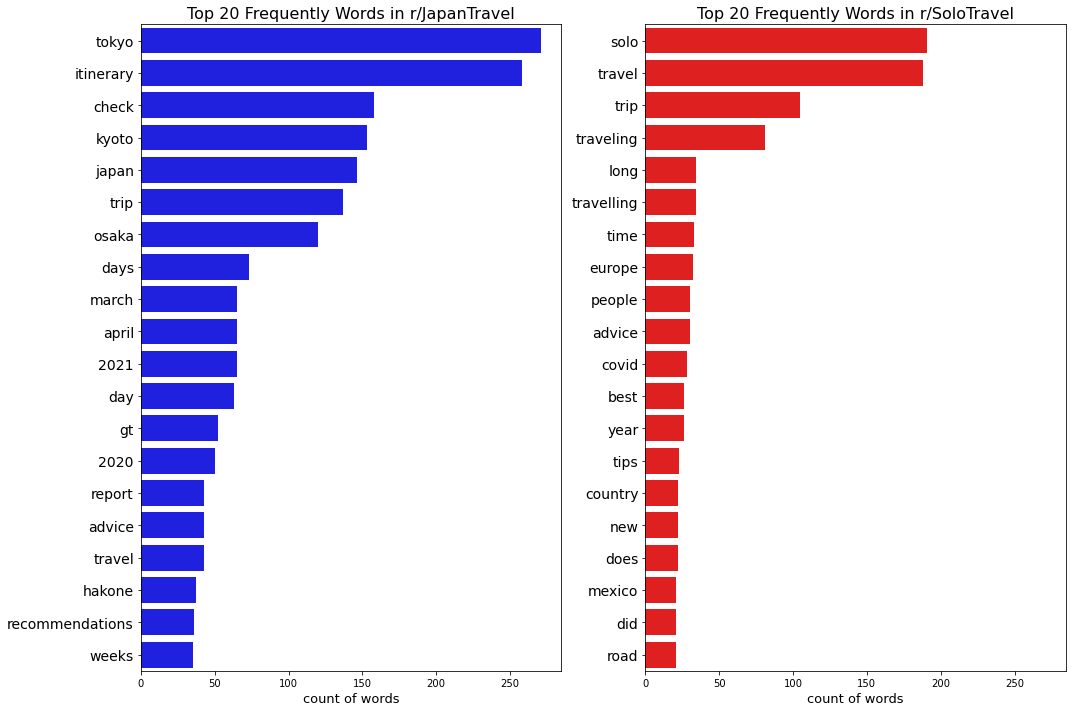

In [13]:
japan_title_20 = japan_title.sum().sort_values(ascending=False).head(20)
solo_title_20 = solo_title.sum().sort_values(ascending=False).head(20)

fig, ax = plt.subplots(1, 2, figsize=(15,10), sharex = True)

#r/JapanTravel
sns.barplot(y=japan_title_20.index.values, x = japan_title_20, color='blue', ax=ax[0])
ax[0].set_title("Top 20 Frequently Words in r/JapanTravel", fontsize=16)
ax[0].set_xlabel('count of words', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

#r/SoloTravel
sns.barplot(y=solo_title_20.index.values, x = solo_title_20, color='red',ax=ax[1])
ax[1].set_title("Top 20 Frequently Words in r/SoloTravel",fontsize=16)
ax[1].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

#### Explore Most Frequent Occuring Words in Posts Feature

Now we will look at the most common "unigram(1-word)" and "bigram(2-words)" words that occurs in both subreddit posts. By performing EDA on the posts, this will give us a further understanding on what distinguishes both subreddits with more text features available. 

We will first create a function to clean each post in both subreddits.

1. Remove links using regex
2. Remove non-letters using regex
3. Convert text to lower case by using .lower() method
4. Lemmatize words which gives us the base words
5. Remove Stopwords which are common words in the english sentence structure like 'the", "them".
6. Join the words back and seperated by a space

##### Unigram

In [14]:
def text_processer(raw_text):
    # Function to convert a raw string of text to a string of words
    # The input is a single string (a raw unprocessed text), and 
    # the output is a single string (a preprocessed text)
    
    # 1. Remove "http", "https", "www", ".com"
    review_text = re.sub("(?:https?:\/\/)?(?:www\.)|(?:https?:\/\/)?(?:www\d\.)|(\.com)", " ", raw_text)
        
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. Lemmatize words.
    lemmed_words = [WordNetLemmatizer().lemmatize(i) for i in words]
    
    # 5. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # 6. Remove stop words.
    meaningful_words = [w for w in lemmed_words if not w in stops]
    
    # 7. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [15]:
# Get the number of documents based on the dataframe size.
total_japan_posts = len(japan_df['posts'])
print(f'There are {total_japan_posts} japan posts.')

total_solo_posts = len(solo_df['title'])
print(f'There are {total_solo_posts} solo posts.')


# Initialize an empty list to hold the clean reviews.
clean_japan_posts = []
clean_solo_posts = []

There are 980 japan posts.
There are 892 solo posts.


In [16]:
print("Cleaning and parsing the japan posts...")

j = 0
for post in japan_df['posts']:
    # Convert review to words, then append to clean_train_reviews.
    clean_japan_posts.append(text_processer(post))
    
    # If the index is divisible by 200, print a message
    if (j + 1) % 50 == 0:
        print(f'Posts {j + 1} of {total_japan_posts}.')
    
    j += 1

# Let's do the same for our SoloTravel posts.

print("Cleaning and parsing the solo posts...")

k = 0
for post in solo_df['posts']:
    # Convert review to words, then append to clean_train_reviews.
    clean_solo_posts.append(text_processer(post))
    
    # If the index is divisible by 50, print a message
    if (k + 1) % 50 == 0:
        print(f'Posts {k + 1} of {total_solo_posts}.')
        
    k += 1

Cleaning and parsing the japan posts...
Posts 50 of 980.
Posts 100 of 980.
Posts 150 of 980.
Posts 200 of 980.
Posts 250 of 980.
Posts 300 of 980.
Posts 350 of 980.
Posts 400 of 980.
Posts 450 of 980.
Posts 500 of 980.
Posts 550 of 980.
Posts 600 of 980.
Posts 650 of 980.
Posts 700 of 980.
Posts 750 of 980.
Posts 800 of 980.
Posts 850 of 980.
Posts 900 of 980.
Posts 950 of 980.
Cleaning and parsing the solo posts...
Posts 50 of 892.
Posts 100 of 892.
Posts 150 of 892.
Posts 200 of 892.
Posts 250 of 892.
Posts 300 of 892.
Posts 350 of 892.
Posts 400 of 892.
Posts 450 of 892.
Posts 500 of 892.
Posts 550 of 892.
Posts 600 of 892.
Posts 650 of 892.
Posts 700 of 892.
Posts 750 of 892.
Posts 800 of 892.
Posts 850 of 892.


In [17]:
print(len(clean_japan_posts))
print(len(clean_solo_posts))

980
892


In [18]:
#see if it works on japantravel
print(clean_japan_posts[1])

discussion organizer express doubt hosting tokyo olympics amp future travel japan january original article asahi ajw article opening thread discussion tokyo olympics possibility travel amid strong insinuation game may cancelled due overwhelming increase spread covid within country occurs highly likely international tourism well could barred majority year due continued serious spread pandemic japan worldwide many user looking plan trip confirm trip feel prudent open discussion topic cancellation game could likely lead continued ban tourism outside asia calendar year article posted asahi shimbun explains cancelling olympics coming closer reality original article asahi ajw article section within article holding particular interest gt event wa postponed last year novel coronavirus pandemic spread scheduled start within day however virus situation ha since worsened tokyo metropolitan area prompting government jan declare monthlong state emergency capital three surrounding prefecture tokyo o

In [19]:
#see if it works on solotravel
print(clean_solo_posts[1])

using solo travel help combat depression thing got crazy past year wa avid traveler took whenever chance arose enjoy learning new culture like anyone else main driving factor behind wa keep mind bay high new place staying distracted managing thing abroad welcome hectic nature helped avoid getting trapped bad place dealt ocd depression anxiety general mood liability issue since high school worsened twenty traveling wa way escape temporarily since back home past year mental state ha gone toilet couple breakdown led unable work ruminating ha extreme realized wa using travel much crutch avoid looking proud many thing done past wa wa running away travel phenomenal privilege great reward found wa becoming much vice already healthy stable place travel really bring appreciation life new level like feel like always running important take long hard look thing every often miserable year ha ha forced face thing head


In [20]:
#instantiate a vectorizer
cvec = CountVectorizer()

In [21]:
#fit to corpus
japan_clean = cvec.fit_transform(clean_japan_posts)

In [22]:
#create a dataframe
japan_clean_df = pd.DataFrame(japan_clean.toarray(), 
                          columns = cvec.get_feature_names())


In [23]:
japan_clean_df.sum().sort_values(ascending=False)

day           5151
tokyo         3317
wa            3020
japan         2120
trip          1909
              ... 
military         1
mill             1
millennial       1
miltary          1
ljyamnt          1
Length: 14658, dtype: int64

In [24]:
#fit to corpus
solo_clean = cvec.fit_transform(clean_solo_posts)

In [25]:
#create a dataframe
solo_clean_df = pd.DataFrame(solo_clean.toarray(), 
                          columns = cvec.get_feature_names())

In [26]:
solo_clean_df.sum().sort_values(ascending=False)

wa          1034
travel       933
trip         888
day          833
would        710
            ... 
slumber        1
slumming       1
slump          1
metaphor       1
fasnacht       1
Length: 9059, dtype: int64

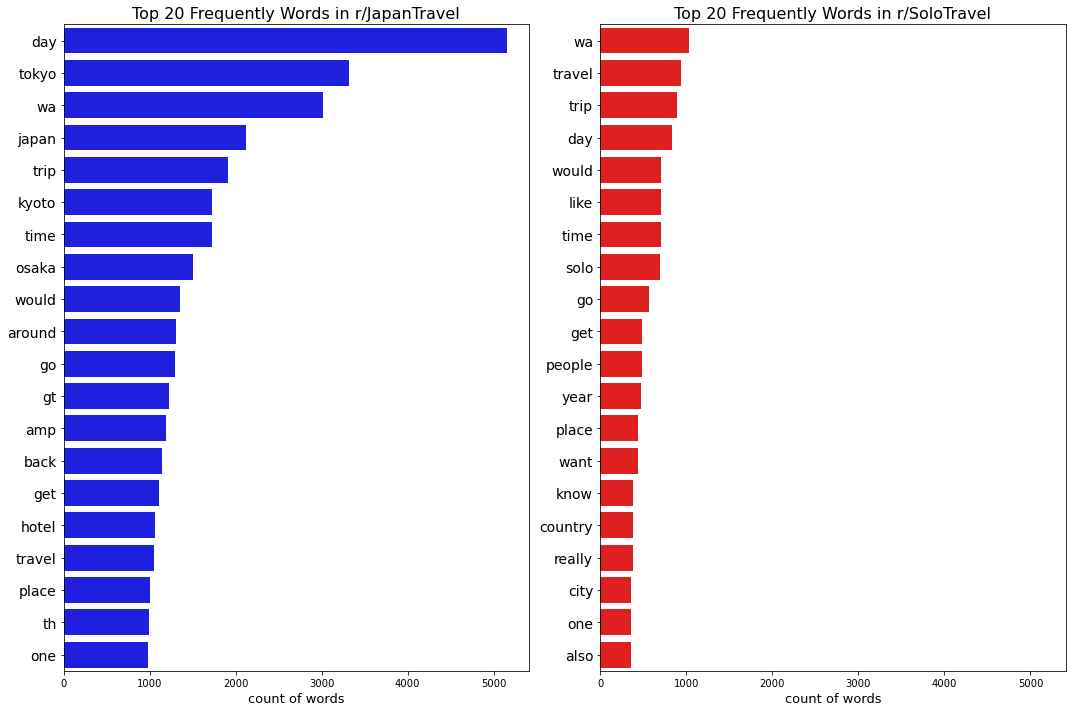

In [27]:
#top 20 unigram words
japan_20 = japan_clean_df.sum().sort_values(ascending=False).head(20)
solo_20 = solo_clean_df.sum().sort_values(ascending=False).head(20)

fig, ax = plt.subplots(1, 2, figsize=(15,10), sharex = True)

#r/JapanTravel
sns.barplot(y=japan_20.index.values, x = japan_20, color='blue', ax=ax[0])
ax[0].set_title("Top 20 Frequently Words in r/JapanTravel", fontsize=16)
ax[0].set_xlabel('count of words', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

#r/SoloTravel
sns.barplot(y=solo_20.index.values, x = solo_20 ,color='red',ax=ax[1])
ax[1].set_title("Top 20 Frequently Words in r/SoloTravel",fontsize=16)
ax[1].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

**JapanTravel**  
Not surprisngly, words like 'tokyo', 'kyoto', 'japan' and 'osaka' are the amongst the most common as they directly refer to Japanese cities. Words like 'itineray', 'trip', 'day' and 'week' could suggest that the users in the subreddit suggested several itineray for trips to Japan. 

**SoloTravel**  
Similary, words like 'solo', 'travel' and 'trip' are the most common in this subreddit, which is also unsurprising. 1 interesting aspect that came up would be words like 'advice', 'experience' or 'question' which could suggest that reddit users provide unique experiences of travelling alone rather than simply providing itinearies of the country. 

#### Bigram

In [28]:
#instantiate a vectorizer
cvec_2 = CountVectorizer(ngram_range = (2,2))

In [29]:
#fit into corpus
japan_clean_2 = cvec_2.fit_transform(clean_japan_posts)

In [30]:
#create dataframe
japan_clean2_df = pd.DataFrame(japan_clean_2.toarray(), 
                          columns = cvec_2.get_feature_names())

In [31]:
japan_clean2_df.sum().sort_values(ascending=False)

http imgur        516
day trip          503
day tokyo         290
nhk jp            222
en news           220
                 ... 
past darkness       1
past decided        1
past direction      1
past draft          1
aa bbbd             1
Length: 141393, dtype: int64

In [32]:
#fit into corpus
solo_clean_2 = cvec_2.fit_transform(clean_solo_posts)

In [33]:
#create dataframe
solo_clean2_df = pd.DataFrame(solo_clean_2.toarray(), 
                          columns = cvec_2.get_feature_names())

In [34]:
solo_clean2_df.sum().sort_values(ascending=False)

solo travel       143
solo trip         102
would like         83
feel like          77
first time         72
                 ... 
popular south       1
popular solo        1
popular scared      1
popular post        1
aa doe              1
Length: 65108, dtype: int64

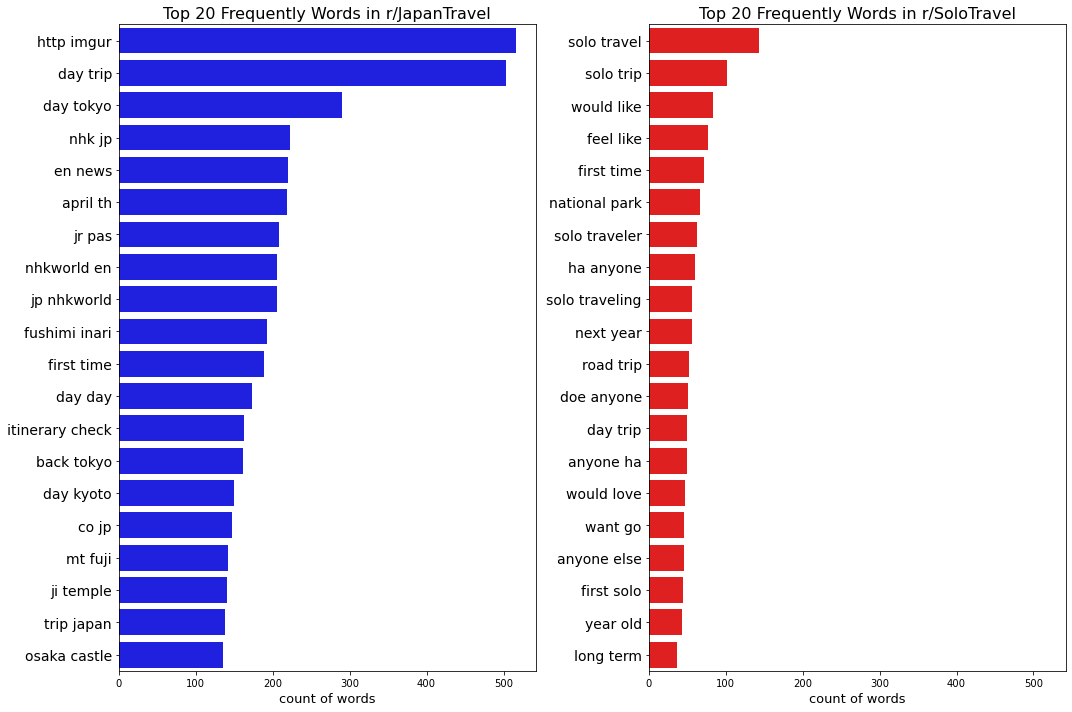

In [35]:
japan2_20 = japan_clean2_df.sum().sort_values(ascending=False).head(20)
solo2_20 = solo_clean2_df.sum().sort_values(ascending=False).head(20)

fig, ax = plt.subplots(1, 2, figsize=(15,10), sharex = True)

#r/JapanTravel
sns.barplot(y=japan2_20.index.values, x = japan2_20, color='blue', ax=ax[0])
ax[0].set_title("Top 20 Frequently Words in r/JapanTravel", fontsize=16)
ax[0].set_xlabel('count of words', fontsize=13)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

#r/SoloTravel
sns.barplot(y=solo2_20.index.values, x = solo2_20 ,color='red',ax=ax[1])
ax[1].set_title("Top 20 Frequently Words in r/SoloTravel",fontsize=16)
ax[1].set_xlabel('count of words', fontsize=13)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

plt.tight_layout()

**JapanTravel**  
Similar to the title, Japan specific words like "tokyo", "osaka" are Japanese cities that we would see under the JapanTravel subreddit. In addition "co jp", "nhk jp" are bigrams that suggest japanese specific links that reddit users might have included. They are links that directs users to Japan websites for ticket venue bookings. 

**SoloTravel**  
Simlar to the above title as well, bigrams like "would love", "anyone else", "feel like" suggest that subreddit users posts experiences of solo travelling rather than the itineary or information of the country location itself. 

### Preprocessing

Before we start to apply our models, we will include the cleaned posts performed above to the JapanTravel and SoloTravel datasets. We will then map categories of the subreddits to "0" and "1" which we can identify them. 

In [36]:
#add clean posts to both datasets
japan_df['cleaned_posts'] = clean_japan_posts
solo_df['cleaned_posts'] = clean_solo_posts

In [37]:
print(japan_df.shape)
japan_df.head()

(980, 6)


,author,title,selftext,subreddit,posts,cleaned_posts
0,amyranthlovely,"Japan Travel, COVID-19, And You: Guidelines On...",##**January 2021 - [**Japan has again closed t...,JapanTravel,"Japan Travel, COVID-19, And You: Guidelines On...",japan travel covid guideline travel amp pandem...
1,amyranthlovely,Discussion: Organizers Express Doubts About Ho...,[**Original Article Here.**](http://www.asahi....,JapanTravel,Discussion: Organizers Express Doubts About Ho...,discussion organizer express doubt hosting tok...
2,Shell_fly,Reflecting on last year’s (less than ordinary)...,"Like many here, I am desperately wishing I cou...",JapanTravel,Reflecting on last year’s (less than ordinary)...,reflecting last year le ordinary trip japan li...
3,somyotdisodomcia,Name of soba restaurant in Arima,"Hello!\n\nIn 2016, on a day trip from Osaka, I...",JapanTravel,Name of soba restaurant in Arima Hello!\n\nIn ...,name soba restaurant arima hello day trip osak...
4,namaehanandesuka,Hyogo in March (focus on nature),I will be traveling with my husband and 2 smal...,JapanTravel,Hyogo in March (focus on nature) I will be tra...,hyogo march focus nature traveling husband sma...


In [38]:
print(solo_df.shape)
solo_df.head()

(892, 6)


,author,title,selftext,subreddit,posts,cleaned_posts
0,lostkarma4anonymity,Travel is the ultimate game,I recently realized that part of the reason I ...,solotravel,Travel is the ultimate game I recently realize...,travel ultimate game recently realized part re...
1,Ihatemygoddamnguts,Using solo travel to help combat depression,"Before things got crazy this past year, I was ...",solotravel,Using solo travel to help combat depression Be...,using solo travel help combat depression thing...
2,TheEntertainer17,Can small dogs handle big hikes? Tips apprecia...,I'm going to be road tripping across the US fo...,solotravel,Can small dogs handle big hikes? Tips apprecia...,small dog handle big hike tip appreciated goin...
3,redwithblackspots527,Opinions of rentberry.com?,This website meets my needs so perfectly im wo...,solotravel,Opinions of rentberry.com? This website meets ...,opinion rentberry website meet need perfectly ...
4,wonderfullywell,Does anyone here have experience traveling wit...,Hey guys.\n\nI'm going to be traveling to Sout...,solotravel,Does anyone here have experience traveling wit...,doe anyone experience traveling tent hey guy g...


In [39]:
#merge the 2 subreddit dataframes together
subreddits_df = pd.concat([japan_df, solo_df])
subreddits_df.shape

(1872, 6)

In [40]:
subreddits_df.head()

,author,title,selftext,subreddit,posts,cleaned_posts
0,amyranthlovely,"Japan Travel, COVID-19, And You: Guidelines On...",##**January 2021 - [**Japan has again closed t...,JapanTravel,"Japan Travel, COVID-19, And You: Guidelines On...",japan travel covid guideline travel amp pandem...
1,amyranthlovely,Discussion: Organizers Express Doubts About Ho...,[**Original Article Here.**](http://www.asahi....,JapanTravel,Discussion: Organizers Express Doubts About Ho...,discussion organizer express doubt hosting tok...
2,Shell_fly,Reflecting on last year’s (less than ordinary)...,"Like many here, I am desperately wishing I cou...",JapanTravel,Reflecting on last year’s (less than ordinary)...,reflecting last year le ordinary trip japan li...
3,somyotdisodomcia,Name of soba restaurant in Arima,"Hello!\n\nIn 2016, on a day trip from Osaka, I...",JapanTravel,Name of soba restaurant in Arima Hello!\n\nIn ...,name soba restaurant arima hello day trip osak...
4,namaehanandesuka,Hyogo in March (focus on nature),I will be traveling with my husband and 2 smal...,JapanTravel,Hyogo in March (focus on nature) I will be tra...,hyogo march focus nature traveling husband sma...


In [41]:
#map subreddit to either '0' or '1'
subreddits_df['label'] = subreddits_df['subreddit'].map({'JapanTravel':0, 'solotravel':1})
subreddits_df['label'].value_counts()

0    980
1    892
Name: label, dtype: int64

### Baseline

We will use the accuracy score based on the majority class of either JapanTravel or SoloTravel subreddits. This will form the benchmark for all our classification models to better

In [42]:
subreddits_df['label'].value_counts(normalize = True)

0    0.523504
1    0.476496
Name: label, dtype: float64

The baseline accuracy is interpreted as if we predict 0 for all posts, we would be right at least 52% of the time.

Our models will need to perform better than 52%

### Modelling

Here we will compare 2 models and run 2 will run 2 vectorizers: CountVectorizer and Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer on each model.

* CountVectoriser simplty returns the number of times a word appears.  
* A TF-IDF score tells us which words are most discriminating between documents. Words that occur often in one document but don't occur in many documents contain a great deal of discriminating power. In other words:
 * Common words are penalized.
 * Rare words have more influence.

##### Create X features and target y

In [43]:
X = subreddits_df['cleaned_posts']
y = subreddits_df['label']

##### Train Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

##### LogisticRegression Model

Logistic regression is one of the most common binary classification algorithm. Logistic regression models describe the relationship between our target variable which is a gbinary outcome, with each feature.

##### Logistic Regression (with CountVectorizer)

In [45]:
#create pipeline
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("lr", LogisticRegression())
    ])

In [46]:
pipe_params = {
    'cvec__max_features': [3500, 4000, 4500],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [0.8, 0.85, 0.9],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.9522792022792023


{'cvec__max_df': 0.8,
 'cvec__max_features': 3500,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2)}

In [47]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

1.0
0.9444444444444444


##### Confusion Matrix

In [48]:
preds = gs.predict(X_test)

In [49]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 230
False Positives: 15
False Negatives: 11
True Positives: 212


##### Logistic Regression (with TFIDF Vectorizer)

In [50]:
pipe2 = Pipeline([
    ("tvec", TfidfVectorizer()),
    ("lr", LogisticRegression())
    ])

In [51]:
pipe_params_tvec = {
    'tvec__max_features': [2500, 3000, 3500],
    'tvec__max_df': [0.3, 0.5, 0.7],
    'tvec__ngram_range': [(1,1), (1,2)],
}
gs_tvec = GridSearchCV(pipe2, param_grid=pipe_params_tvec, cv=5, n_jobs = -1)
gs_tvec.fit(X_train, y_train)
print(gs_tvec.best_score_)
gs_tvec.best_params_

0.9544178952719878


{'tvec__max_df': 0.5, 'tvec__max_features': 3000, 'tvec__ngram_range': (1, 2)}

In [52]:
print(gs_tvec.score(X_train, y_train))
print(gs_tvec.score(X_test, y_test))

0.9850427350427351
0.9572649572649573


##### Confusion Matrix

In [53]:
preds_tvec = gs_tvec.predict(X_test)

In [54]:
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 234
False Positives: 11
False Negatives: 9
True Positives: 214


##### Naive Bayes Model (Multinomial)

Naive Bayes modelling is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In this case we choose the the MultiNomial Naive Bayes as:
* The columns of X are all integer counts, so MultinomialNB is the best choice here.

#####  Multinomial Naive Bayes (with CountVectorizer)

In [55]:
pipe3 = Pipeline([
    ("cvec", CountVectorizer()),
    ("nb", MultinomialNB())
    ])

In [56]:
pipe_3_params = {
    'cvec__max_features': [1000, 1500, 2000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [0.75, 0.8, 0.85],
    'cvec__ngram_range': [(1,1), (1,2)],
}

In [57]:
gs_nb = GridSearchCV(pipe3, param_grid=pipe_3_params, cv=5, n_jobs = -1)
gs_nb.fit(X_train, y_train)
print(gs_nb.best_score_)
gs_nb.best_params_

0.9074046771733604


{'cvec__max_df': 0.75,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

In [58]:
print(gs_nb.score(X_train, y_train))
print(gs_nb.score(X_test, y_test))

0.9202279202279202
0.9123931623931624


##### Confusion Matrix

In [59]:
preds_nb = gs_nb.predict(X_test)

In [60]:
tn, fp, fn, tp = confusion_matrix(y_test, preds_nb).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 209
False Positives: 36
False Negatives: 5
True Positives: 218


#####  Multinomial Naive Bayes (with TFIDF Vectorizer)

In [61]:
pipe4 = Pipeline([
    ("tvec", TfidfVectorizer()),
    ("nb", MultinomialNB())
    ])

In [62]:
pipe_params_nbtvec = {
    'tvec__max_features': [2500, 3000, 3500],
    'tvec__max_df': [0.3, 0.5, 0.7],
    'tvec__ngram_range': [(1,1), (1,2)],
}
gs_nbtvec = GridSearchCV(pipe4, param_grid=pipe_params_nbtvec, cv=5, n_jobs = -1)
gs_nbtvec.fit(X_train, y_train)
print(gs_nbtvec.best_score_)
gs_nbtvec.best_params_

0.9387544483985766


{'tvec__max_df': 0.7, 'tvec__max_features': 3500, 'tvec__ngram_range': (1, 1)}

In [63]:
print(gs_nbtvec.score(X_train, y_train))
print(gs_nbtvec.score(X_test, y_test))

0.9693732193732194
0.9358974358974359


##### Confusion Matrix

In [64]:
preds_nbtvec = gs_nbtvec.predict(X_test)

In [65]:
tn, fp, fn, tp = confusion_matrix(y_test, preds_nbtvec).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 224
False Positives: 21
False Negatives: 9
True Positives: 214


##### Model Selection

Based on the model scores we have obtained, we will evaluate which is the best model for our us.

In [66]:
print(f"Logistic Regression with CountVectorizer: {gs.best_score_}")
print(f"Logistic Regression with TFIDF Vectorizer: {gs_tvec.best_score_}")
print(f"Multinomial NB with CountVectorizer: {gs_nb.best_score_}")
print(f"Multinomial NB with TFIDF Vectorizer: {gs_nbtvec.best_score_}")

Logistic Regression with CountVectorizer: 0.9522792022792023
Logistic Regression with TFIDF Vectorizer: 0.9544178952719878
Multinomial NB with CountVectorizer: 0.9074046771733604
Multinomial NB with TFIDF Vectorizer: 0.9387544483985766


| Model                                     | Best Score | Training Accuracy Score | Testing Accuracy Score | Wrongly Classified |
|:-------------------------------------------|:------------|:-------------------------|:------------------------|:--------------------|
| Logistic Regression with CountVectorizer  | 0.9522     | 1.0                     | 0.944                  | 26                 |
| Logistic Regression with TFIDF Vectorizer | 0.9544     | 0.985                   | 0.957                  | 20                 |
| Multinomial NB with CountVectorizer       | 0.9074     | 0.920                   | 0.912                  | 41                 |
| Multinomial NB with TFIDF Vectorizer      | 0.9387      | 0.969                   | 0.935                  | 30                 |

* Fundamentally, all our models were able to perform better than the baseline accuracy. This could be due to the specificity of Japanese terms that could distinguish the 2 posts.    

* In terms of model score, **Logistic Regression with TFIDF Vectorizer** seems to perform the best amongst the 4 models than we ran. It has the highest accuracy score with the lowest error of wrongly classified posts. Hence we will choose this model.  

* Overall it gives us a good balance of the bias variance tradeoff as Logistic Regression with CountVectorizer is largely overfitted.

##### Model Test Data

In [67]:
#instantiate vectorizer
opti_tvec = TfidfVectorizer(max_df = 0.5, max_features = 3000, ngram_range=(1,2))

In [68]:
# Fit our tvec on the training data and transform training data.
X_train_tvec = pd.DataFrame(opti_tvec.fit_transform(X_train).todense(),
                          columns = opti_tvec.get_feature_names())

In [69]:
# Transform our testing data with the already-fit tvec.
X_test_tvec = pd.DataFrame(opti_tvec.transform(X_test).todense(),
                         columns = opti_tvec.get_feature_names())

In [70]:
# Instantiate our model
nb = MultinomialNB()

# Fit our model
model = nb.fit(X_train_tvec,y_train)

In [71]:
print(model.score(X_train_tvec,y_train))
model.score(X_test_tvec,y_test)

0.9529914529914529


0.9188034188034188

##### Analysis of Coefficients

In [72]:
word_features = gs_tvec.best_estimator_.named_steps['tvec'].get_feature_names()
word_coef = gs_tvec.best_estimator_.named_steps['lr'].coef_[0]

In [75]:
coef_df = pd.DataFrame({'feature':word_features,'coef':word_coef})
coef_df.sort_values(by=['coef'], inplace=True, ascending=False)
coef_df.head(10)

,feature,coef
2317,solo,3.799834
2669,travel,3.217139
1126,hostel,2.394855
474,country,2.214629
482,covid,2.077941
2684,traveling,1.781792
726,europe,1.519933
1557,mexico,1.376094
1863,people,1.317174
1591,month,1.269691


In [76]:
coef_df.tail(10)

,feature,coef
2390,station,-1.124461
1633,nara,-1.149455
1034,hakone,-1.214311
1771,onsen,-1.318918
1957,prefecture,-1.328595
1245,japanese,-2.032444
1793,osaka,-2.553233
1348,kyoto,-2.758157
2594,tokyo,-4.797825
1229,japan,-4.841777


Coefficient of each word feature represents the log odds that a posts is correctly classified. This means that 1 unit change in a word would increase log odds of success.

**Positive coefficients** increases the log odds and thus increases the posibility that the post will be clasified as SoloTravel

**Negative coefficients** decreases the log oods and thus decreases the probability that a post will be classifed as Solotravel.

Thus, words with **positive coefficients** are associated with SoloTravel

Words with **negative coefficients** are associated with JapanTravel

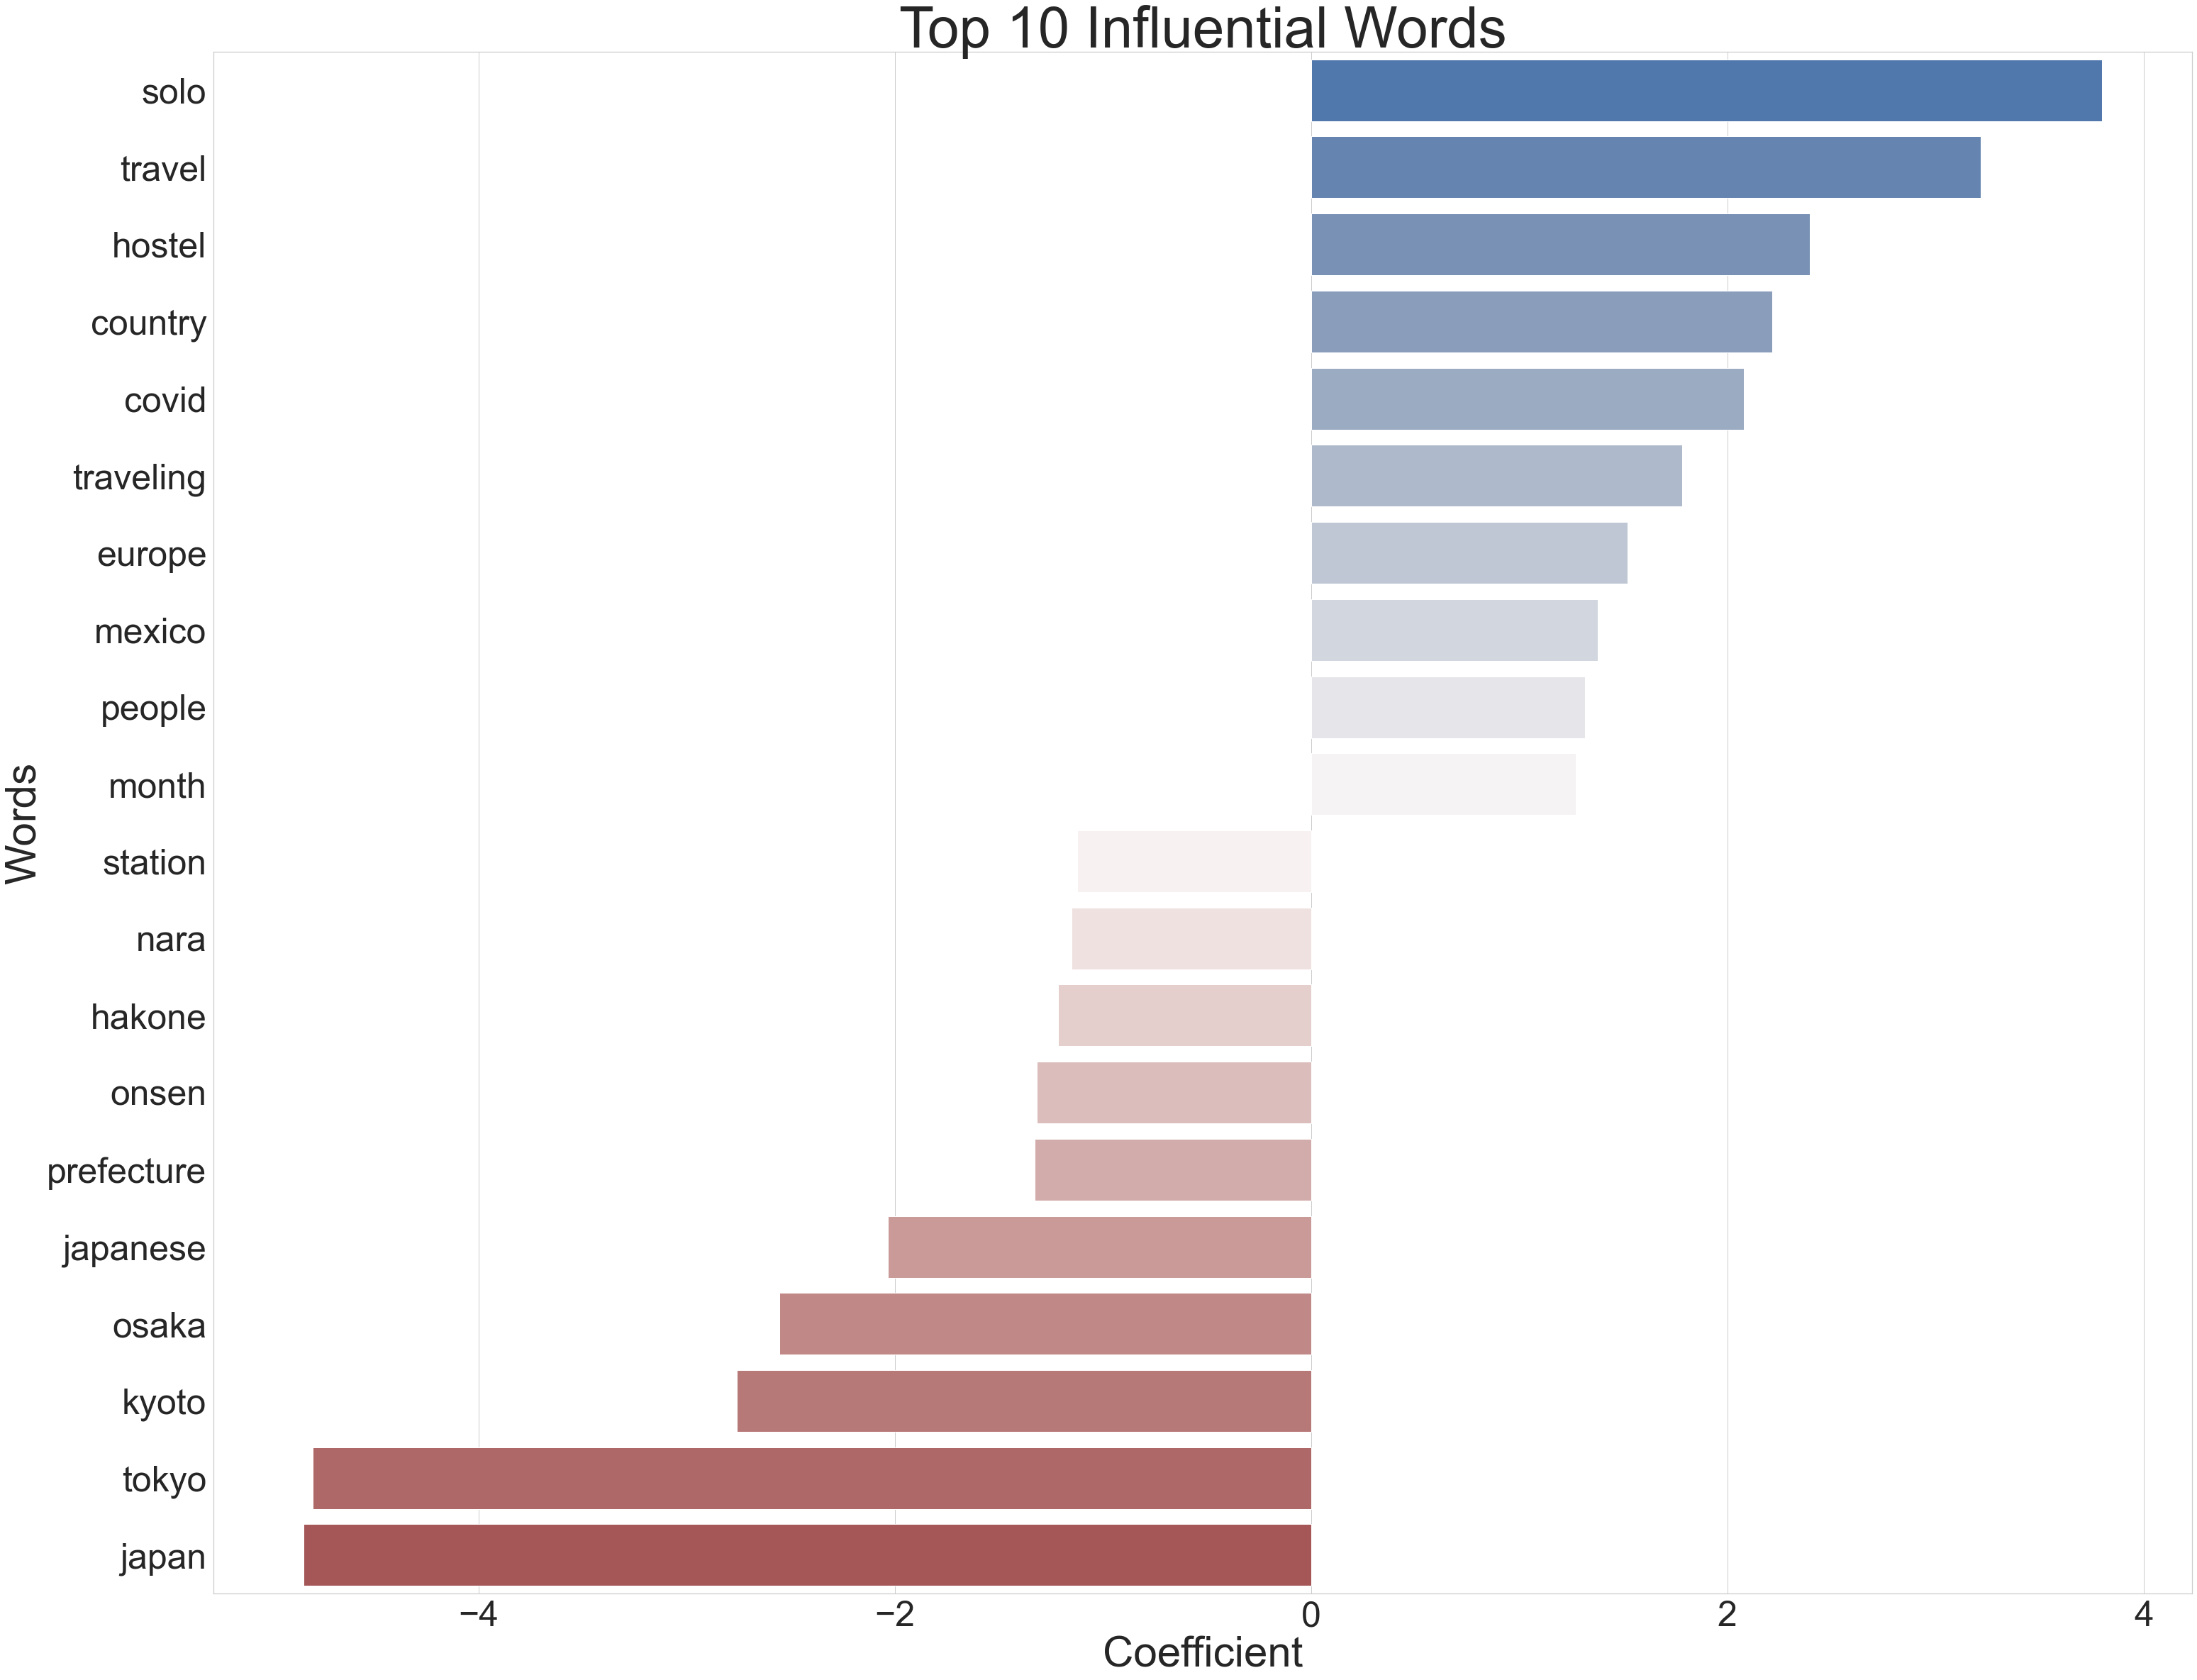

In [130]:
#top 10 words of JapanTravel and SoloTravel
coef_df_10 = pd.concat([coef_df.head(10), coef_df.tail(10)])

#plot using sns
sns.set(style='whitegrid',rc={"figure.figsize": (50, 40)})
sns.barplot(y='feature',x='coef', data=coef_df_10, palette=("vlag"), hue_order=["JapanTravel, SoloTravel"])
plt.title('Top 10 Influential Words', fontsize=80)
plt.tick_params(labelsize=50)
plt.xlabel('Coefficient', fontsize=60)
plt.ylabel('Words', fontsize=60)
plt.savefig('top_10.jpg')

### Classification Metrics

In [109]:
#performing the same matrix calculation as above
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 234
False Positives: 11
False Negatives: 9
True Positives: 214


In [108]:
cm = confusion_matrix(y_test, preds_tvec)
#create a data frame for confusion matrix
pd.DataFrame(data = cm, 
             columns = ['Predicted JapanTravel', 'Predicted Solotravel'],
             index = ['Actual JapanTravel', 'Actual SoloTravel'])

,Predicted JapanTravel,Predicted Solotravel
Actual JapanTravel,234,11
Actual SoloTravel,9,214


##### Precision

In [110]:
prec = tp/(tp+fp)
print(prec)

0.9511111111111111


Precision also known as the postive predicted value which also means if we predict a post to be SoloTravel, how many of these post are correctly classified as SoloTravel. At a precision score of 95%, it means that the risk of a type 1 error or false postives is 5%.

##### Recall

In [111]:
recall =  tp / (tp + fn)
print(recall)

0.9596412556053812


Recall is also known as the true positive rate which also means how many SoloPosts were correctly classified as a SoloPost if given that it is not a JapanTravel post. A recall score of 96% means a lower risk of type 2 error.


In [105]:
print(classification_report(y_test,preds_nb))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       245
           1       0.86      0.98      0.91       223

    accuracy                           0.91       468
   macro avg       0.92      0.92      0.91       468
weighted avg       0.92      0.91      0.91       468



##### F1

Our **F1** score measures the balance between precision and recall that we have calculated earlier. At a measure of 0.91, it is close to 1.0 and thus it can be and evaluation metric for a good model.

In [106]:
roc_auc_score(y_test, preds_nb)

0.9153198499130595

An ROC AUC score of 0.91 is close to 1.0 which means there is a good seperation bewteen the 2 sets of posts such that error of misclassification is lower.

## Recomendations and Conclusions

* Using Logistic Regression with TFIDF Vectorizer on our subreddit posts, the model was able to classify both posts at an accuracy rate of **96%**

* This was partially due to the Japan specific nature of some terms like Japanese Cities and Japanese infrastructure that would often appear in a JapanTravel Subreddit. 

* From the similar nature of travel, I would have expected that many posts would have been misclassfied. But having 20 misclassfied posts is still an acceptable range of error.

* From the EDA performed on the most common and influential words, we do understand that the fundamental difference between the 2 posts came from which SoloTravel was more of sharing "personal experiences", whereas JapanTravel shares different itinearies within Japan itself, providing information on buses and trains and tourist locations.

* Thus this can help travel companies segregate the market, and be more efficient to cater to the different needs of each travel requests.

## Further Exploration

* Perhaps we could inlclude all the comments from reddit users reacting to each post. It could provide some interesting words that might be harder for the model to achieve such high accuracy scores. However we will require another API for us to scrap it from reddit.

* We could have more than 1000 posts as well. Currently our API only allows us to obtain a maximum of 1000 posts. Having more posts, again, could come up with more vocablulary for our model.

* Perhaps we could also adopt other models like Random Forest or KNN with boosting that could yield a higher accuracy score for this classification model. 